<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/ao_dls_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth Limited Search (DLS)

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 1>/dev/null

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [3]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx

In [4]:
def _dls(G, u, limit):
  if limit > 0:
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          G.nodes[v]['path'] = u
          G.nodes[v]['reached'] = True
          _dls(G, v, limit - 1)

def dls(G, s, limit):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['reached'] = False  # alcanzado pero no explorado

  G.nodes[s]['reached'] = True
  _dls(G, s, limit)

  path = [0]*G.number_of_nodes()
  for v, data in G.nodes.data():
    path[v] = data['path']

  return path

In [9]:
%%file 1.adjlist
0 1 4
1
2
3 2 6 17
4 7
5 2
6 10
7 0 8
8 4
9 8
10
11 8 14
12 16
13 9 17
14 15
15 11 17
16 15 17
17 13

Overwriting 1.adjlist


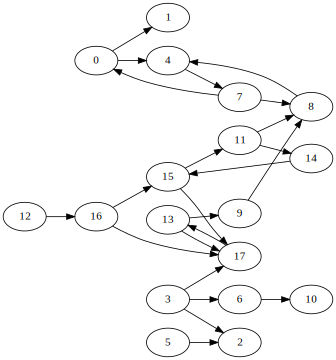

In [10]:
G = nx.read_adjlist('1.adjlist', create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 16, 12, 16]


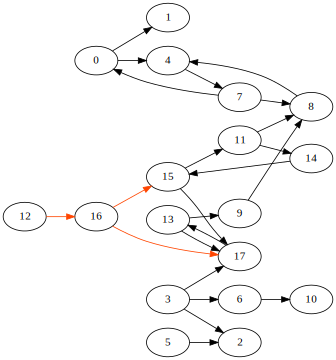

In [11]:
path = dls(G, 12, limit=2)
print(path)
gs.nx2gv(G, path=path)

[-1, -1, -1, -1, -1, -1, -1, -1, 11, -1, -1, 15, -1, 17, 11, 16, 12, 15]


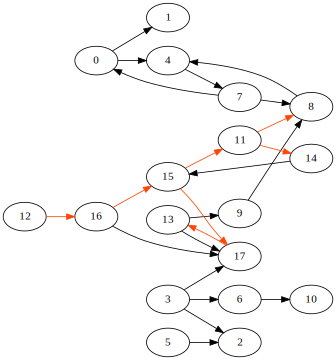

In [13]:
path = dls(G, 12, limit=4)
print(path)
gs.nx2gv(G, path=path)

[7, 0, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


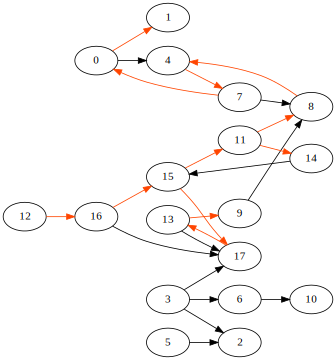

In [15]:
path = dls(G, 12, limit=100)
print(path)
gs.nx2gv(G, path=path)

# Iterative Depth Search (IDS)

In [18]:
def ids(G, start, target):
  for limit in range(G.number_of_edges()):
    path = dls(G, start, limit)
    if G.nodes[target]['reached']:
      break

  return path

[-1, -1, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


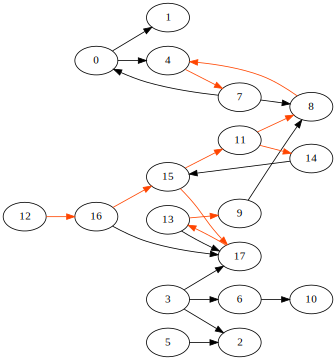

In [19]:
path = ids(G, start=12, target=7)
print(path)
gs.nx2gv(G, path=path)

[7, 0, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


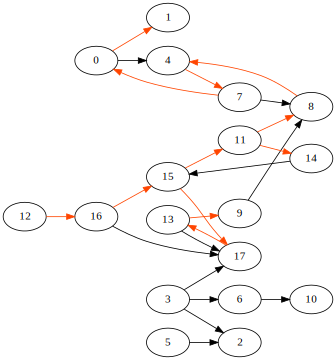

In [20]:
path = ids(G, start=12, target=10)
print(path)
gs.nx2gv(G, path=path)